In [26]:
!pip install nltk
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import nltk

In [5]:
data = pd.read_csv('Corona_NLP_test.csv')
data.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3437,3438,48390,"Washington, DC",16-03-2020,The supermarket business is booming! #COVID2019,Neutral
3784,3785,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive
3199,3200,48152,"Northern Rockies, USA",15-03-2020,Walmart &amp; Sam's are showing low stock here...,Negative
3311,3312,48264,NaN,15-03-2020,Should U.K. supermarkets consider temporarily ...,Extremely Positive
1967,1968,46920,NaN,13-03-2020,I was at the grocery store this morning at 6:3...,Negative


In [7]:
is_NYC = data.Location == 'NYC'

In [8]:
is_NYC.sample(5)

685     False
26      False
836     False
1392    False
2831    False
Name: Location, dtype: bool

In [11]:
dataNYC = data[is_NYC]

In [13]:
dataNYC.shape

(10, 6)

In [15]:
dataNYC.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
867,868,45820,NYC,12-03-2020,"https://t.co/UIyysVsc1x\r\r\n\r\r\n""This is ab...",Neutral
1428,1429,46381,NYC,13-03-2020,Anxiety levels are high over #Covid_19 The las...,Positive
2463,2464,47416,NYC,14-03-2020,Dried pasta section at a grocery store near my...,Extremely Positive
3491,3492,48444,NYC,16-03-2020,Want to get some really fresh fish? How about ...,Extremely Positive
2137,2138,47090,NYC,13-03-2020,Everybody is being so extra about the Corona V...,Neutral


# Part 2

In [17]:
from collections import Counter
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diegoortizmatajira\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [42]:
custom_stop_words = ['I', 'ON', 'for', 'UPDATE', 'https']
useless = stopwords.words('english') + custom_stop_words
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (useless)]))
Counter(' '.join(data['OriginalTweet']).split()).most_common(100)

[('#Covid_19', 1383),
 ('#coronavirus', 1021),
 ('food', 902),
 ('grocery', 749),
 ('store', 736),
 ('stock', 628),
 ('people', 606),
 ('&amp;', 510),
 ('shopping', 395),
 ('online', 381),
 ('The', 361),
 ('supermarket', 345),
 ('panic', 333),
 ('toilet', 326),
 ('prices', 315),
 ('need', 314),
 ('?', 305),
 ('-', 302),
 ('like', 300),
 ('get', 298),
 ('COVID-19', 259),
 ('#COVID19', 248),
 ('going', 241),
 ('buying', 239),
 ('go', 238),
 ('local', 231),
 ('paper', 220),
 ('#CoronavirusPandemic', 216),
 ('If', 212),
 ('This', 194),
 ('We', 187),
 ('buy', 177),
 ('due', 175),
 ('time', 174),
 ('#COVID2019', 168),
 ('home', 162),
 ('stores', 161),
 ('work', 161),
 ('#CoronaOutbreak', 158),
 ('help', 156),
 ('#Coronavirus', 153),
 ('shelves', 150),
 ('retail', 141),
 ('us', 141),
 ('#coronapocalypse', 130),
 ('everyone', 129),
 ('food,', 127),
 ('would', 125),
 ('demand', 124),
 ('don\x92t', 122),
 ('one', 122),
 ('19', 122),
 ('My', 118),
 ('consumer', 118),
 ('still', 117),
 ('hand', 11

Reference: [Simple WordCloud Using nltk Library in Python](https://datafai.com/simple-wordcloud-using-nltk-library-in-python/)

In [43]:
wordcloud = WordCloud(stopwords = useless, max_words = 100).generate(' '.join(data['OriginalTweet']))

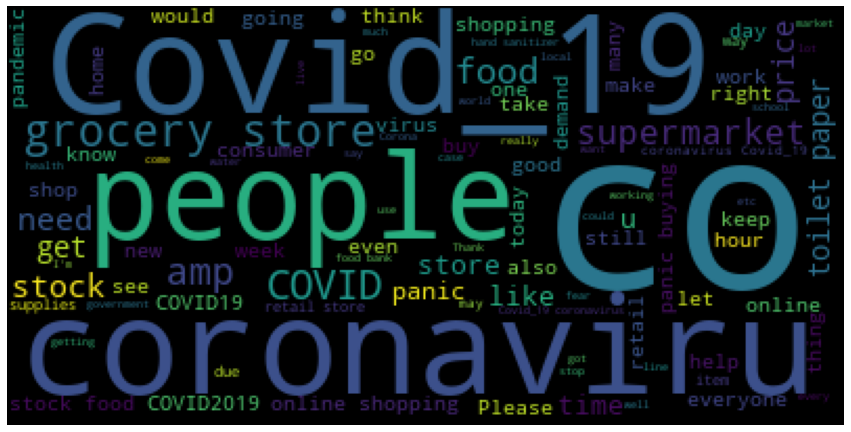

In [44]:
plt.figure(figsize = (15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()